In [1]:
# Linear Regression alg
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Load dataset from local dir
dataset=pd.read_csv('dataset.csv')

In [4]:
dataset

,area,price
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000
...,...,...
1455,7917,175000
1456,13175,210000
1457,9042,266500
1458,9717,142125


In [5]:
# summarize the data
dataset.shape

(1460, 2)

In [6]:
dataset.head(5)

,area,price
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


In [7]:
# Data Cleaning
dataset.dtypes

area     int64
price    int64
dtype: object

In [8]:
dataset.isna().sum()

area     0
price    0
dtype: int64

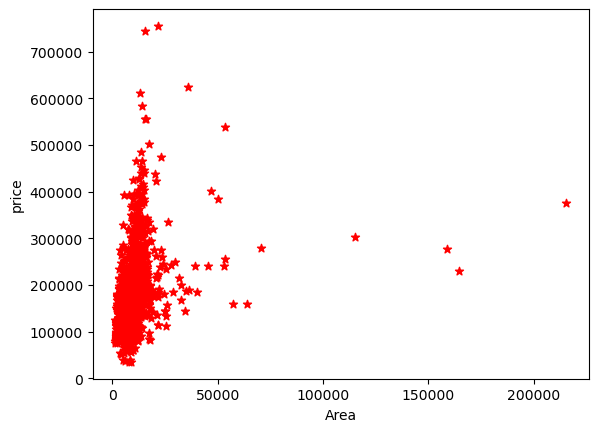

In [10]:
# Visualize Datset
plt.xlabel('Area')
plt.ylabel('price')
plt.scatter(dataset.area,dataset.price,color='red',marker='*')
plt.show()

In [14]:
# Segregate dataset into i/p X & o/p Y
X=dataset.drop('price',axis='columns')
X

,area
0,8450
1,9600
2,11250
3,9550
4,14260
...,...
1455,7917
1456,13175
1457,9042
1458,9717


In [13]:
Y=dataset.price
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: price, Length: 1460, dtype: int64

In [15]:
# Training Dataset using LInear Regression
model=LinearRegression()
model.fit(X,Y)

LinearRegression()

In [16]:
# Predict price for Land Sq.ft of custom values
x=40000
landAreainSqft=[[x]]
result=model.predict(landAreainSqft)
result

E:\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([242835.02996518])

In [17]:
# let's check is our model is Right?
m=model.coef_
m

array([2.09997195])

In [18]:
#intercept
c=model.intercept_
c

158836.1518968766

In [19]:
# Y=mx+c
y=m*x+c
print(f"The price of {y} sqftland is {x} ")

The price of [242835.02996518] sqftland is 40000 


In [20]:
# USecase 2: Exam mark prediction using Linear Regression - Multiple Variable
# Import lib
import pandas as pd
from sklearn.linear_model import LinearRegression

In [21]:
# Load dataset
dataset=pd.read_csv('data.csv')

In [22]:
dataset

,hours,age,internet,marks
0,6.83,15,1,78.50
1,6.56,16,0,76.74
2,NaN,17,1,78.68
3,5.67,18,0,71.82
4,8.67,19,1,84.19
...,...,...,...,...
196,8.56,19,1,84.68
197,8.94,20,1,86.75
198,6.60,15,1,78.05
199,8.35,16,1,83.50


In [23]:
dataset.shape

(201, 4)

In [24]:
dataset.head(5)

,hours,age,internet,marks
0,6.83,15,1,78.50
1,6.56,16,0,76.74
2,NaN,17,1,78.68
3,5.67,18,0,71.82
4,8.67,19,1,84.19


In [26]:
# Finding & Removing NAN from our Features X
dataset.columns[dataset.isna().any()]

Index(['hours'], dtype='object')

In [27]:
dataset.dtypes

hours       float64
age           int64
internet      int64
marks       float64
dtype: object

In [28]:
dataset.isna().sum()

hours       6
age         0
internet    0
marks       0
dtype: int64

In [29]:
dataset.hours=dataset.hours.fillna(dataset.hours.mean())

In [30]:
dataset.isna().sum()

hours       0
age         0
internet    0
marks       0
dtype: int64

In [31]:
# Segregate dataset into i/p X and o/p Y
X=dataset.iloc[:,:-1].values
X

array([[ 6.83      , 15.        ,  1.        ],
       [ 6.56      , 16.        ,  0.        ],
       [ 6.99061538, 17.        ,  1.        ],
       [ 5.67      , 18.        ,  0.        ],
       [ 8.67      , 19.        ,  1.        ],
       [ 7.55      , 20.        ,  0.        ],
       [ 6.67      , 15.        ,  0.        ],
       [ 8.99      , 16.        ,  0.        ],
       [ 6.99061538, 17.        ,  1.        ],
       [ 6.75      , 18.        ,  0.        ],
       [ 6.59      , 19.        ,  0.        ],
       [ 8.56      , 20.        ,  1.        ],
       [ 7.75      , 15.        ,  0.        ],
       [ 7.9       , 16.        ,  1.        ],
       [ 8.19      , 17.        ,  0.        ],
       [ 6.55      , 18.        ,  1.        ],
       [ 6.36      , 19.        ,  0.        ],
       [ 8.44      , 20.        ,  1.        ],
       [ 8.41      , 15.        ,  0.        ],
       [ 7.67      , 16.        ,  1.        ],
       [ 7.42      , 17.        ,  1.   

In [32]:
Y=dataset.iloc[:,-1].values
Y

array([78.5 , 76.74, 78.68, 71.82, 84.19, 81.18, 76.99, 85.46, 70.66,
       77.82, 75.37, 83.88, 79.5 , 80.76, 83.08, 76.03, 76.04, 85.11,
       82.5 , 80.58, 82.18, 83.36, 70.67, 75.02, 70.96, 83.33, 74.75,
       75.65, 74.15, 80.17, 82.27, 76.14, 71.1 , 84.35, 83.08, 76.76,
       81.24, 78.21, 73.08, 83.23, 70.27, 86.41, 71.1 , 82.84, 82.38,
       72.96, 77.46, 70.11, 72.38, 71.41, 72.22, 77.77, 84.44, 71.45,
       82.21, 85.48, 75.03, 86.65, 70.9 , 71.7 , 73.61, 79.41, 76.19,
       80.43, 85.78, 70.06, 81.25, 81.7 , 69.27, 82.79, 71.8 , 71.79,
       74.97, 78.61, 77.59, 72.33, 72.08, 77.33, 70.05, 73.34, 84.  ,
       82.93, 76.63, 75.36, 77.29, 72.87, 73.4 , 81.74, 71.85, 84.6 ,
       79.56, 82.1 , 72.08, 79.1 , 81.01, 76.48, 75.39, 68.57, 83.64,
       82.3 , 75.18, 82.03, 82.99, 79.26, 77.55, 77.07, 72.1 , 73.25,
       74.25, 70.58, 81.08, 75.04, 76.38, 80.86, 78.42, 74.44, 70.34,
       85.04, 73.61, 75.55, 76.2 , 82.69, 76.83, 79.53, 83.57, 85.95,
       76.02, 77.65,

In [33]:
# Train the Dataset using Linear REgression MOdel
model=LinearRegression()
model.fit(X,Y)

LinearRegression()

In [35]:
#predict exam marks based on hours,age and internet
data=[[8.67,19,1]]
model.predict(data)

array([84.19238177])

In [36]:
# Splitting dataset into Train & Test
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [38]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [39]:
# prediction for all test data
y_pred=model.predict(X_test)

In [40]:
y_pred

array([83.53539516, 71.33678303, 73.06921319, 85.25094664, 73.57089203,
       84.42137591, 80.15074461, 81.7139447 , 81.04668297, 82.05331455,
       78.98963482, 84.67567586, 77.9244664 , 77.66020883, 83.03371632,
       85.69408863, 84.8455124 , 72.97691899, 78.90669175, 79.33082825,
       84.02346922, 85.54325759, 74.86048343, 81.37639844, 72.34371785,
       80.47141219, 79.05721955, 82.03613263, 77.94548913, 82.27203356,
       75.69187774, 84.38184456, 72.1476515 , 75.57693088, 70.57114987,
       78.93292156, 75.42609984, 84.22135915, 74.16273824, 71.66467492,
       76.13319616, 81.28045708, 76.31420741, 81.47804377, 81.61982692,
       80.66747854, 77.94548913, 74.33257478, 73.16545779, 76.22913752,
       70.7690398 ])

In [42]:
from sklearn.metrics import mean_squared_error
result=mean_squared_error(Y_test, y_pred)
result

2.162638390335183